In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("ped_crashes.csv")


# Clean-Up

In [2]:
df['Crash: Hit-and-Run'].replace(to_replace='Hit-and-run', value=1, inplace=True)
df['Crash: Hit-and-Run'].replace(to_replace='Not hit-and-run',  value=0, inplace=True)

df['Crash: Intersection'].replace(to_replace='Intersection crash', value=1, inplace=True)
df['Crash: Intersection'].replace(to_replace='Not intersection crash',  value=0, inplace=True)
df['Person Age'].replace(to_replace="DOB invalid", value = "NaN", inplace = True)
df['Weather Conditions (2016+)'].replace(to_replace="Uncoded & errors", value = "NaN",inplace = True)
df['Speed Limit at Crash Site'].replace(to_replace="Uncoded & errors", value = "NaN",inplace = True)
df['Lighting Conditions'].replace(to_replace="Other / unknown",value = "NaN",inplace=True)
df['Lighting Conditions'].replace(to_replace="Uncoded & errors",value = "NaN",inplace=True)
df['Person Gender'].replace(to_replace="Uncoded & errors",value = "NaN",inplace=True)


df['Person Age'] = pd.to_numeric(df['Person Age'], errors='coerce')
df['Speed Limit at Crash Site'] = pd.to_numeric(df['Speed Limit at Crash Site'], errors='coerce')
#df = df.drop("Party Type", axis = 1)

### First, let's see what was the most dangerous city in terms of car crashes

## 1.) What city has the most car crashes

In [3]:
[df['City or Township'].max()]

df[df['City or Township'] == 'Wayne County: Wyandotte']

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
24,2018,November,1,9:00 AM - 10:00 AM,Thursday,Wayne County: Wyandotte,1,0,Daylight,Rain,25.0,Possible injury (C),Motor vehicle driver,21.0,Female
31,2018,December,1,11:00 AM - 12:00 noon,Saturday,Wayne County: Wyandotte,1,0,Daylight,Cloudy,25.0,No injury (O),Motor vehicle driver,59.0,Female
211,2018,April,9,5:00 PM - 6:00 PM,Monday,Wayne County: Wyandotte,1,1,Dawn,Snow,35.0,Possible injury (C),Motor vehicle driver,NaN,NaN
215,2018,July,9,1:00 PM - 2:00 PM,Monday,Wayne County: Wyandotte,0,1,Daylight,Clear,25.0,Possible injury (C),Motor vehicle driver,54.0,Male
309,2018,November,12,5:00 PM - 6:00 PM,Monday,Wayne County: Wyandotte,1,0,Dawn,Cloudy,25.0,Possible injury (C),Motor vehicle driver,53.0,Female
324,2018,June,13,7:00 PM - 8:00 PM,Wednesday,Wayne County: Wyandotte,1,0,Daylight,Clear,30.0,Possible injury (C),Motor vehicle driver,42.0,Female
366,2018,December,14,6:00 AM - 7:00 AM,Friday,Wayne County: Wyandotte,1,0,Dark lighted,Cloudy,30.0,Suspected minor injury (B),Motor vehicle driver,35.0,Male
812,2018,December,30,8:00 PM - 9:00 PM,Sunday,Wayne County: Wyandotte,1,0,Dark lighted,Clear,45.0,No injury (O),Motor vehicle driver,45.0,Female
829,2017,March,1,9:00 PM - 10:00 PM,Wednesday,Wayne County: Wyandotte,0,0,Dark unlighted,Cloudy,25.0,Suspected minor injury (B),Motor vehicle driver,85.0,Female
925,2017,September,4,10:00 PM - 11:00 PM,Monday,Wayne County: Wyandotte,1,0,Dark unlighted,Clear,45.0,Suspected serious injury (A),Motor vehicle driver,22.0,Female


### Now, what is the trend of car crashes happening

## 2.) Plot the number of fatalities per years

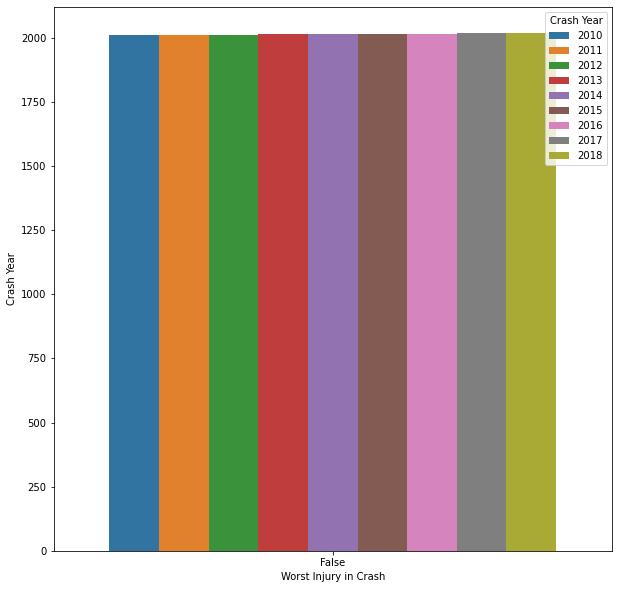

In [4]:
plt.figure(figsize=(10,10))
trueCrashes = df['Worst Injury in Crash'].str.contains("Fatal")
sns.barplot(x = trueCrashes == "True", y = df['Crash Year'], hue = df['Crash Year'], ci = None);


### What is the most dangerous time to be driving

## 3.) What time of day has the most car crashes

In [5]:
df['Time of Day'].value_counts()

df[df['Time of Day']  == '6:00 PM - 7:00 PM']

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
3,2018,February,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,1,1,Dark lighted,Clear,30.0,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
14,2018,August,1,6:00 PM - 7:00 PM,Wednesday,Wayne County: Belleville,1,0,Daylight,Clear,25.0,Possible injury (C),Motor vehicle driver,36.0,Male
26,2018,November,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,0,0,Dusk,Rain,NaN,Possible injury (C),Motor vehicle driver,69.0,Male
28,2018,November,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,1,0,Dark lighted,Rain,25.0,No injury (O),Motor vehicle driver,26.0,Female
45,2018,November,2,6:00 PM - 7:00 PM,Friday,Wayne County: Van Buren Twp.,0,1,Dark lighted,Clear,NaN,Possible injury (C),Motor vehicle driver,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,2010,January,27,6:00 PM - 7:00 PM,Wednesday,Wayne County: Redford Twp.,0,0,Dark lighted,NaN,40.0,Suspected serious injury (A),Motor vehicle driver,26.0,Male
6741,2010,May,28,6:00 PM - 7:00 PM,Friday,Wayne County: Highland Park,0,0,Daylight,NaN,30.0,Suspected serious injury (A),Motor vehicle driver,21.0,Male
6745,2010,May,28,6:00 PM - 7:00 PM,Friday,Wayne County: Detroit,1,1,Daylight,NaN,30.0,Possible injury (C),Motor vehicle driver,NaN,NaN
6753,2010,September,28,6:00 PM - 7:00 PM,Tuesday,Wayne County: Detroit,1,1,Dusk,NaN,35.0,Suspected minor injury (B),Motor vehicle driver,NaN,NaN


### Now, let's see the trend of crashes happening throughout the year

## 4.) Graph the amount crashes for each month

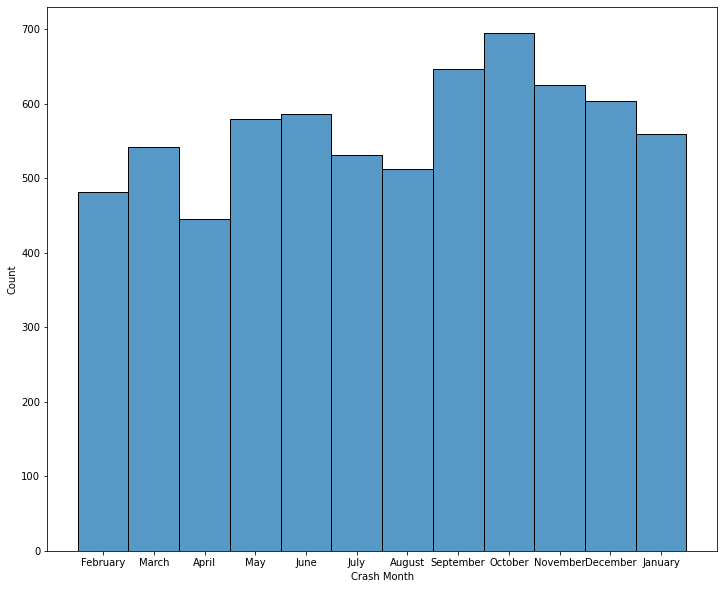

In [6]:
plt.figure(figsize=(12,10))
sns.histplot(df['Crash Month']);


### Now, how about the trend of crashes throughout the week

## 5.) Graph the amount of crashes for each day 

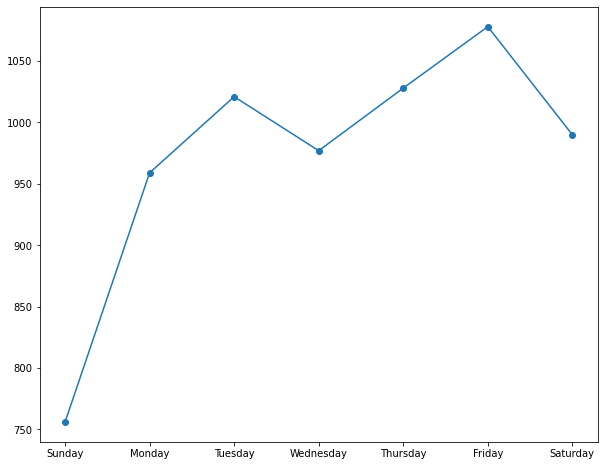

In [7]:
plt.figure(figsize=(10,8))
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
crashes = [756,959,1021,977,1028,1078,990]
plt.plot(days,crashes, marker = 'o');

### Let's see who is responsible for the largest amount of crashes

## 6.) Graph a histogram for crashes caused by males and females

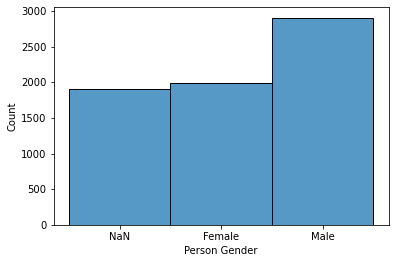

In [8]:
genders = df[df['Person Gender'] != 'Uncoded & errors'] 

sns.histplot(genders['Person Gender']);

### Let's see the likelihood of crashes to happen in the some of the worst conditions, night and rainy

## 7.) What is the percentage of crashes that occured during rainy nights?

In [9]:
night = df[df['Lighting Conditions'].isin(['Dark lighted' ,'Dark unlighted'])]
realWeather = night[night['Weather Conditions (2016+)'] != 'np.nan']
percent = ((night['Weather Conditions (2016+)'] == 'Rain').sum()) / realWeather['Weather Conditions (2016+)'].count()
percent * 100

5.259417199715707

## 8.) What is the percent of car crashes that did not happened in high speed areas ( 30 mph +) over those which did?

In [10]:
lowSpeed = df[(df['Speed Limit at Crash Site'] < 30 )]
highSpeed = df[(df['Speed Limit at Crash Site'] >= 30 )]

lowSpeed['Speed Limit at Crash Site'].count()/highSpeed['Speed Limit at Crash Site'].count()


0.576152546463915

## 9.) What is the average age for people that cause fatal car crashes?

In [11]:
fatal = df[df['Worst Injury in Crash'] == 'Fatal injury (K)']
fatal.groupby(fatal['Worst Injury in Crash'])['Person Age'].mean()

Worst Injury in Crash
Fatal injury (K)    41.936111
Name: Person Age, dtype: float64

## 10.) What was the safest day of the month?

In [12]:
safe = df[~df['Worst Injury in Crash'].isin(['Fatal injury (K)','Suspected serious injury (A)'])]
safe['Crash Day'].value_counts(ascending=True)


31     93
27    134
29    137
26    142
10    148
28    149
15    150
22    150
5     158
19    162
30    163
6     167
13    168
23    173
4     173
1     173
25    173
24    175
2     176
18    179
7     179
16    179
12    180
3     183
20    184
8     184
17    188
9     191
14    197
11    199
21    205
Name: Crash Day, dtype: int64

## 11.) For the city of Detriot, how many times on average do hit and runs happen?

In [13]:
Detroit = df[df['City or Township'] == 'Wayne County: Detroit']
Detroit.groupby(Detroit['City or Township'])['Crash: Hit-and-Run'].mean() 

City or Township
Wayne County: Detroit    0.441779
Name: Crash: Hit-and-Run, dtype: float64

## 12.) For each city, what is the average amount of hit and runs and intersection crashes

In [14]:
intersections = df.groupby(['City or Township'])['Crash: Intersection'].mean()
hitAndRun = df.groupby(['City or Township'])['Crash: Hit-and-Run'].mean()

pd.concat([intersections,hitAndRun],axis = 1)

,Crash: Intersection,Crash: Hit-and-Run
City or Township,,
Wayne County: Allen Park,0.406250,0.218750
Wayne County: Belleville,0.700000,0.000000
Wayne County: Brownstown Twp.,0.211538,0.096154
Wayne County: Canton Twp.,0.336634,0.207921
Wayne County: Dearborn,0.352436,0.214900
Wayne County: Dearborn Heights,0.374046,0.236641
Wayne County: Detroit,0.457407,0.441779
Wayne County: Ecorse,0.500000,0.166667
Wayne County: Flat Rock,0.600000,0.100000


In [15]:
df

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
0,2018,February,1,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,0,1,Daylight,Clear,35.0,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
1,2018,February,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,0,1,Dark lighted,Clear,30.0,Suspected serious injury (A),Motor vehicle driver,44.0,Female
2,2018,February,1,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,1,1,Daylight,Cloudy,30.0,Possible injury (C),Motor vehicle driver,NaN,NaN
3,2018,February,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,1,1,Dark lighted,Clear,30.0,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
4,2018,March,1,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,0,1,Daylight,Snow,25.0,No injury (O),Motor vehicle driver,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,2010,July,31,2:00 AM - 3:00 AM,Saturday,Wayne County: Detroit,1,1,Dark unlighted,NaN,25.0,Fatal injury (K),Motor vehicle driver,NaN,NaN
6805,2010,August,31,2:00 PM - 3:00 PM,Tuesday,Wayne County: Livonia,1,0,Daylight,NaN,40.0,Suspected minor injury (B),Motor vehicle driver,22.0,Female
6806,2010,October,31,8:00 PM - 9:00 PM,Sunday,Wayne County: Detroit,0,1,Daylight,NaN,15.0,Possible injury (C),Motor vehicle driver,NaN,NaN
6807,2010,December,31,1:00 PM - 2:00 PM,Friday,Wayne County: Wayne,1,1,Daylight,NaN,35.0,Possible injury (C),Motor vehicle driver,NaN,Male
